In [5]:
import networkx as nx
import network2
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [6]:
G = network2.SocialGraph()
tmp = G.load_data("likes.json", num_posts=None)

# Testing data

In [8]:
[(post, len(likes)) for post, likes in G.data.items() if len(likes) > 1000]

[(u'120064698011379_1031000830251090', 7555),
 (u'120064698011379_1003013176383189', 5848),
 (u'120064698011379_1027422743942232', 1250),
 (u'120064698011379_1024433697574470', 2940),
 (u'120064698011379_1016023605082146', 5748),
 (u'120064698011379_1071439332873906', 1002),
 (u'120064698011379_1003938112957362', 5947),
 (u'120064698011379_1060838970600609', 3569),
 (u'120064698011379_1042648282419678', 2042),
 (u'120064698011379_1050181558333017', 2544),
 (u'120064698011379_1034308036587036', 5160),
 (u'120064698011379_1012434382107735', 3340)]

In [ ]:
posts_graph = G.create_posts_graph()

In [ ]:
page_ranks = nx.pagerank(posts_graph)
ranks = sorted([(y,x) for x,y in page_ranks.items()])
print ranks[-10:]

In [ ]:
nx.info(posts_graph)

In [ ]:
plt.hist(nx.degree(posts_graph).values())
plt.show()

In [ ]:
users_graph = G.create_users_graph(threshold=5)
nx.info(users_graph)

In [ ]:
nx.info(users_graph)
import matplotlib.pyplot as plt

nx.draw(users_graph)
plt.show()

In [ ]:
plt.hist(nx.degree(users_graph).values())
plt.show()

In [ ]:
reload(network2)
users_graph = G.create_users_weighted_graph()
print nx.info(users_graph)

In [ ]:
[x for x in users_graph.edges(data=True) if x[2]['weight'] > 2]

In [ ]:
nx.write_edgelist(users_graph, "weighted.edgelist")

# Load graph

In [7]:
G.users_graph = nx.read_edgelist("weighted.edgelist")

In [8]:
G.users = {}
for post, likes in G.data.items():
    for like in likes:
        G.users[like['id']] = like['name']
G.users['10153295741841150']

u'Ahmet Bulut'

In [54]:
print "Total number of posts: ", len(G.data)
print "Total number of users: ", len(G.users)
print "Total number of likes: ", sum([len(likes) for likes in G.data.values()])


Total number of posts:  1877
Total number of users:  46061
Total number of likes:  96593


In [12]:
import json
with open("users_graph_centralities.json") as inputfile:
    G.users_graph_data = json.load(inputfile)

# Remove edges with 1 connection and separated nodes

In [9]:
edges_to_remove = [x for x in G.users_graph.edges(data=True) if x[2]['weight'] == 1]
G.users_graph.remove_edges_from(edges_to_remove)

In [10]:
nodes_to_remove = [x for x in G.users_graph.nodes() if G.users_graph.degree(x) == 0]
G.users_graph.remove_nodes_from(nodes_to_remove)

In [11]:
nx.info(G.users_graph)

'Name: \nType: Graph\nNumber of nodes: 4725\nNumber of edges: 241233\nAverage degree: 102.1092'

# Centralities and Pagerank

In [21]:
G.calculate_users_centralities()

Calculating degree centralities ...
Calculating closeness centralities ...
Calculating betweenness centralities ...
Calculating eigenvector centralities ...
Calculating pagerank ...


{'betweenness_centrality': {u'949886555118496': 0.00032009450060139377,
  u'10204366360558932': 0.0,
  u'10207544450461928': 0.0,
  u'1569824466679297': 0.0,
  u'126835070681249': 0.0,
  u'10207813843898463': 0.0,
  u'1105409046169779': 0.0,
  u'533718360142707': 1.4483054629938893e-06,
  u'1894160087477320': 9.911586025946127e-08,
  u'812516532185679': 0.0,
  u'10156664473365603': 0.0006796376692440346,
  u'619306864887182': 3.075601981398937e-05,
  u'552404038256746': 1.1124881247604602e-05,
  u'966918733377010': 0.0,
  u'906103299509709': 0.0,
  u'10154087683567491': 0.0,
  u'10153951852096698': 4.3554832320676557e-07,
  u'962653873816346': 0.00014402353823362015,
  u'208091552883562': 2.4182860774161707e-07,
  u'10206053080554264': 7.684278356461789e-07,
  u'758411184290318': 4.229106333054859e-06,
  u'1705609963041338': 0.00014645003500047787,
  u'2009359185956345': 4.203986161835621e-05,
  u'10209303159842931': 1.8409385061543018e-05,
  u'1044492198954062': 0.008062655546044972,


In [35]:
print "Top 10 highest degree centralities:"
top_degree = sorted(G.users_graph_data['degree_centrality'].items(), key=lambda x: x[1], reverse=True)[:10]
top_degree = [(x[0], G.users[x[0]], x[1]) for x in top_degree]
for node in top_degree:
    print "    ", node[1], " (", node[0], "): ", node[2]

Top 10 highest degree centralities:
     خاسن الي درسن  ( 1057278421005314 ):  0.600973751058
     Abdullah Rashid  ( 968406996574582 ):  0.508467400508
     Sonetistanbul Sonet  ( 464091933791287 ):  0.492379339543
     Talha Şamil Çakır  ( 931101056938705 ):  0.485605419136
     Batuhan Öztürk  ( 978658882219620 ):  0.402201524132
     Büşranur Bekman  ( 1711017259143920 ):  0.373412362405
     TuğBa ÇeTin  ( 10209109891688270 ):  0.365791701948
     Gizem Henden  ( 10206719097509832 ):  0.365368331922
     Rabiul Islam  ( 1031227086935126 ):  0.336367485182
     Live & Study in Turkey  ( 147513122078393 ):  0.334250635055


In [31]:
print "Top 10 highest closeness centralities:"
top_closeness = sorted(G.users_graph_data['closeness_centrality'].items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = [(G.users[x[0]], x[1]) for x in top_closeness]
for node in top_closeness:
    print "    ", node[0], ": ", node[1]

Top 10 highest closeness centralities:
     خاسن الي درسن :  0.712411400995
     Abdullah Rashid :  0.668364459536
     Sonetistanbul Sonet :  0.660145332588
     Talha Şamil Çakır :  0.660053094872
     Batuhan Öztürk :  0.623630363036
     Büşranur Bekman :  0.612075667271
     Gizem Henden :  0.609155383623
     TuğBa ÇeTin :  0.609076843734
     Rabiul Islam :  0.598050386125
     Live & Study in Turkey :  0.597823335864


In [32]:
print "Top 10 highest betweenness centralities:"
top_betweenness = sorted(G.users_graph_data['betweenness_centrality'].items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = [(G.users[x[0]], x[1]) for x in top_betweenness]
for node in top_betweenness:
    print "    ", node[0], ": ", node[1]

Top 10 highest betweenness centralities:
     Talha Şamil Çakır :  0.106911051112
     خاسن الي درسن :  0.0983854097114
     Sonetistanbul Sonet :  0.0727885267584
     Hüseyin Tarık Aydın :  0.0674485584997
     Abdullah Rashid :  0.0634490930518
     Batuhan Öztürk :  0.0416644584129
     TuğBa ÇeTin :  0.0319498106216
     Büşranur Bekman :  0.0169499271607
     Gizem Henden :  0.0165556854866
     Rabiul Islam :  0.0160040635909


In [33]:
print "Top 10 highest eigenvector centralities:"
top_eigenvector = sorted(G.users_graph_data['eigenvector_centrality'].items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = [(G.users[x[0]], x[1]) for x in top_eigenvector]
for node in top_eigenvector:
    print "    ", node[0], ": ", node[1]

Top 10 highest eigenvector centralities:
     خاسن الي درسن :  0.249915281716
     Sonetistanbul Sonet :  0.212784876295
     Talha Şamil Çakır :  0.205868912175
     Batuhan Öztürk :  0.204823192065
     Abdullah Rashid :  0.19652901159
     Live & Study in Turkey :  0.143863151433
     TuğBa ÇeTin :  0.134422375329
     Seydi Onur Yılmaz :  0.129602308292
     Rabiul Islam :  0.128963654437
     Hüseyin Tarık Aydın :  0.128250092729


In [36]:
print "Top 10 highest pagerank:"
top_pagerank = sorted(G.users_graph_data['pagerank'].items(), key=lambda x: x[1], reverse=True)[:10]
top_pagerank = [(x[0], G.users[x[0]], x[1]) for x in top_pagerank]
for node in top_pagerank:
    print "    ", node[1], " (", node[0], "): ", node[2]

Top 10 highest pagerank:
     خاسن الي درسن  ( 1057278421005314 ):  0.0112648184214
     Talha Şamil Çakır  ( 931101056938705 ):  0.0108607411215
     Sonetistanbul Sonet  ( 464091933791287 ):  0.0102657955672
     Abdullah Rashid  ( 968406996574582 ):  0.00872113245581
     Hüseyin Tarık Aydın  ( 10207167522279394 ):  0.00835311288239
     Batuhan Öztürk  ( 978658882219620 ):  0.00815751798655
     TuğBa ÇeTin  ( 10209109891688270 ):  0.00602148238066
     Gizem Henden  ( 10206719097509832 ):  0.00481151318436
     Rabiul Islam  ( 1031227086935126 ):  0.00477945357002
     Live & Study in Turkey  ( 147513122078393 ):  0.00473692248636


In [10]:
[x for x in G.users_graph.edges(data=True) if x[2]['weight'] > 150]

[(u'1057278421005314', u'464091933791287', {'weight': 175}),
 (u'1057278421005314', u'978658882219620', {'weight': 200}),
 (u'1057278421005314', u'968406996574582', {'weight': 181}),
 (u'10207167522279394', u'931101056938705', {'weight': 287}),
 (u'978658882219620', u'968406996574582', {'weight': 154})]

# Clustering coefficient

In [ ]:
nodes_clustering = nx.clustering(G.users_graph)
graph_average_clustering = nx.average_clustering(G.users_graph)

print "Average clustering of the whole graph = ", graph_average_clustering
print "top 10 nodes considering clustering coefficient: "
top_clustering = sorted(nodes_clustering.items(), key=lambda x: x[1], reverse=True)[:10]

In [49]:

len([x for x in nodes_clustering.values() if x == 1])

1864

# Connected components

In [57]:
nx.number_connected_components(G.users_graph)

1

# Diameter

In [ ]:
nx.diameter(G.users_graph)

5

# Cliques

In [ ]:
nx.graph_number_of_cliques(G.users_graph)

# Export graph

In [51]:
users_in_graph = {uid: G.users[uid] for uid in G.users_graph.node.keys()}
nx.set_node_attributes(G.users_graph, "name", users_in_graph)
nx.write_gml(G.users_graph, "users_graph.gml")

# Plot

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

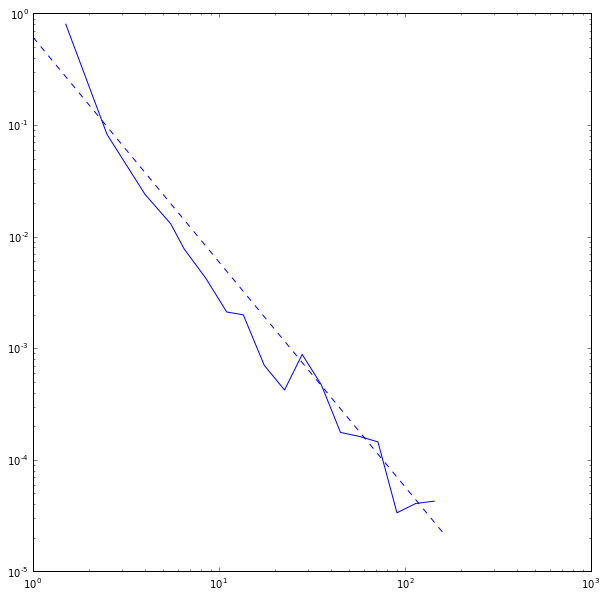

('alpha= ', 2.0143087167362292, '  sigma= ', 0.019033163911112816)


In [39]:


import powerlaw
import numpy
plt.figure(figsize=(10,10))
degree_frequencies = nx.degree_histogram(G.users_graph)
fit = powerlaw.Fit(numpy.array(degree_frequencies)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

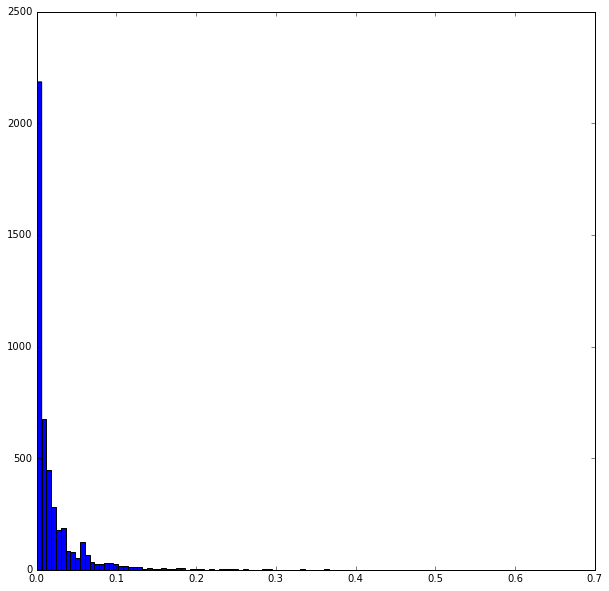

In [18]:
plt.figure(figsize=(10,10))
plt.hist(G.users_graph_data['degree_centrality'].values(), bins=100)
plt.show()

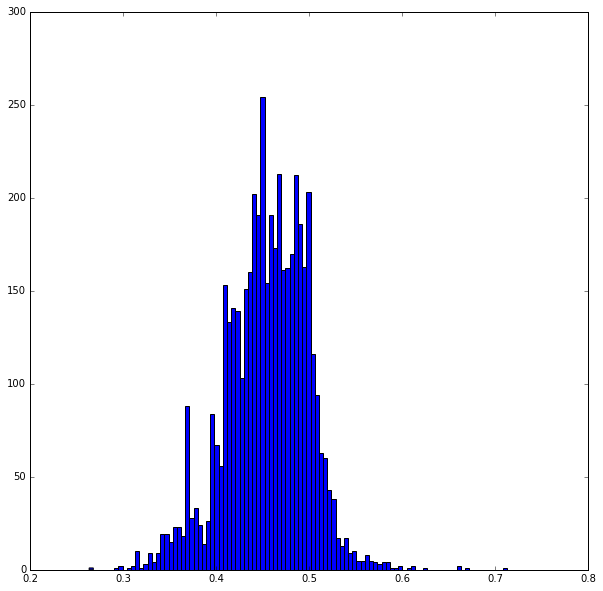

In [19]:
plt.figure(figsize=(10,10))
plt.hist(G.users_graph_data['closeness_centrality'].values(), bins=100)
plt.show()

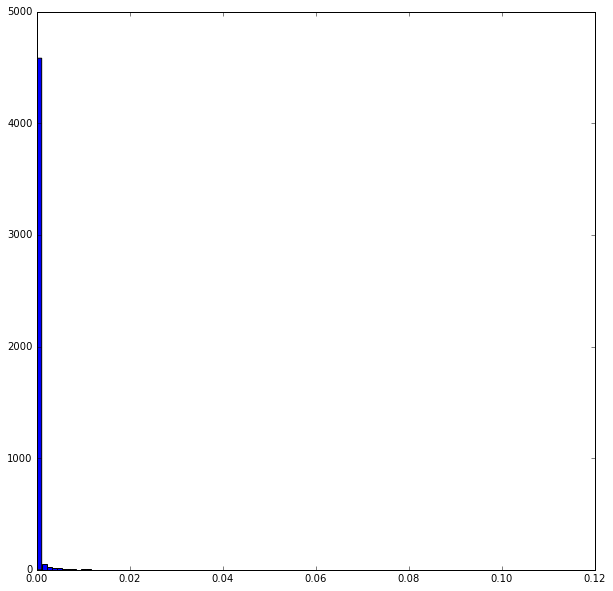

In [20]:
plt.figure(figsize=(10,10))
plt.hist(G.users_graph_data['betweenness_centrality'].values(), bins=100)
plt.show()

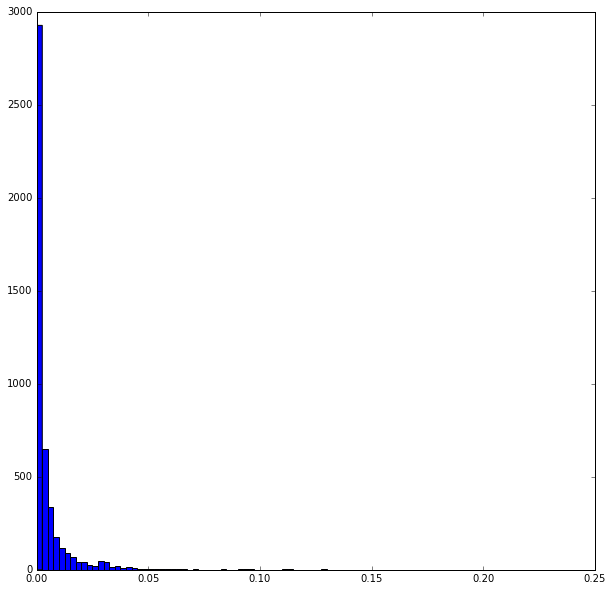

In [21]:
plt.figure(figsize=(10,10))
plt.hist(G.users_graph_data['eigenvector_centrality'].values(), bins=100)
plt.show()

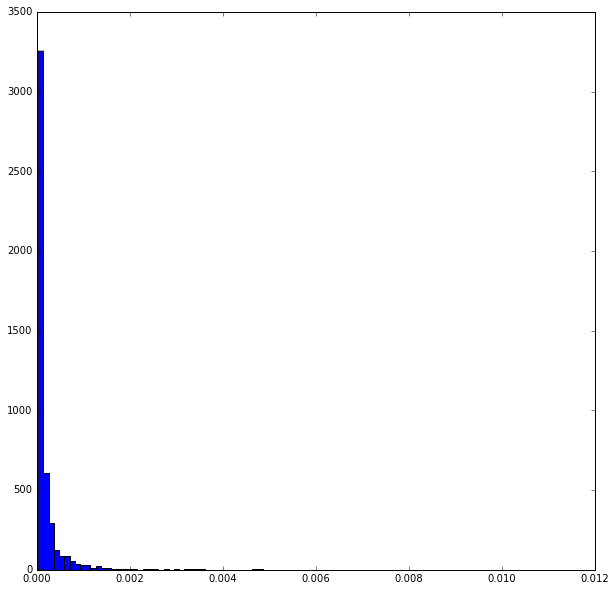

In [22]:
plt.figure(figsize=(10,10))
plt.hist(G.users_graph_data['pagerank'].values(), bins=100)
plt.show()

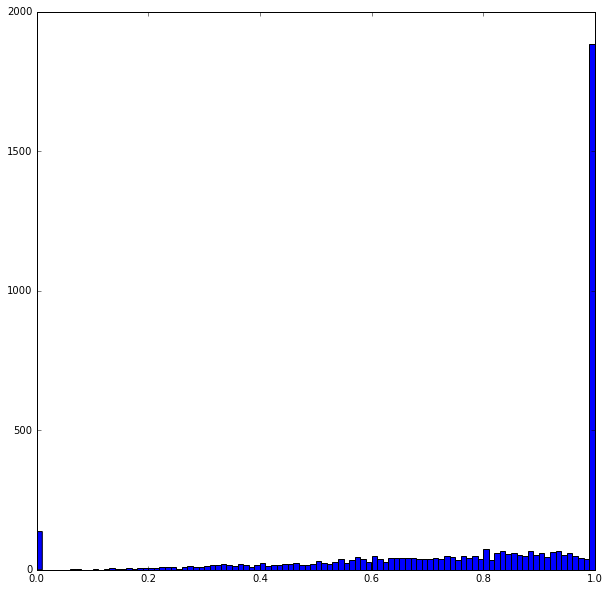

Average for the whole graph was:  0.796289417149


In [55]:
plt.figure(figsize=(10,10))
plt.hist(nodes_clustering.values(), bins=100)
plt.show()

print "Average for the whole graph was: ", graph_average_clustering

# Surprise

In [43]:
print "prof. Bulut's centralities"
print 'degree_centrality: ', G.users_graph_data['degree_centrality']['10153295741841150']
print "betweenness_centrality: ", G.users_graph_data['betweenness_centrality']['10153295741841150']
print "eigenvector_centrality: ", G.users_graph_data['eigenvector_centrality']['10153295741841150']
print "closeness_centrality: ", G.users_graph_data['closeness_centrality']['10153295741841150']
print "pagerank: ", G.users_graph_data['pagerank']['10153295741841150']

prof. Bulut's centralities
degree_centrality:  0.139712108383
betweenness_centrality:  0.00291605091892
eigenvector_centrality:  0.0367892528053
closeness_centrality:  0.535358114234
pagerank:  0.00134460682468
